<a href="https://colab.research.google.com/github/IcarusFe1l/ArkadasimHG/blob/main/Task2BK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the Task1 I followed this approach: first to get

In [1]:
import pandas as pd
import numpy as np


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
dfpredict = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_data.csv')

In [4]:
dfpredict.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

Now we came to the selection part.

In [5]:
y = dfpredict.loc[:,['current_value']]

In [6]:
X = dfpredict.loc[:,['minutes played','assists','goals','age','appearance','award','highest_value']]

In [7]:
X.head()


,minutes played,assists,goals,age,appearance,award,highest_value
0,9390,0.000000,0.000000,32.0,104,13,70000000
1,1304,0.000000,0.000000,30.0,15,1,22000000
2,292,0.000000,0.000000,37.0,4,4,6000000
3,6408,0.056180,0.028090,25.0,82,9,50000000
4,5031,0.017889,0.017889,30.0,63,21,80000000


In [8]:
X.describe()

,minutes played,assists,goals,age,appearance,award,highest_value
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04
mean,2470.789381,0.086978,0.125554,26.041903,36.407011,1.960759,6.152606e+06
std,2021.703271,0.143351,0.235585,4.777629,26.526541,3.743936,1.338988e+07
min,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000e+00
25%,660.000000,0.000000,0.000000,22.000000,12.000000,0.000000,4.500000e+05
50%,2101.500000,0.040773,0.045969,26.000000,35.000000,1.000000,1.500000e+06
75%,3968.000000,0.133136,0.172263,29.000000,59.000000,2.000000,5.000000e+06
max,9510.000000,4.000000,11.250000,43.000000,107.000000,92.000000,2.000000e+08


Do I need to delete some of the data to clear such things like missing apperance or minutes played? 0 on minutes played and apperance might be correlated

In [9]:
from sklearn.tree import DecisionTreeRegressor
# Fix the seed to the random number generator to ensure same results each run.
mdlDtrMlb = DecisionTreeRegressor(random_state=1)

In [10]:
mdlDtrMlb.fit(X,y)

DecisionTreeRegressor(random_state=1)

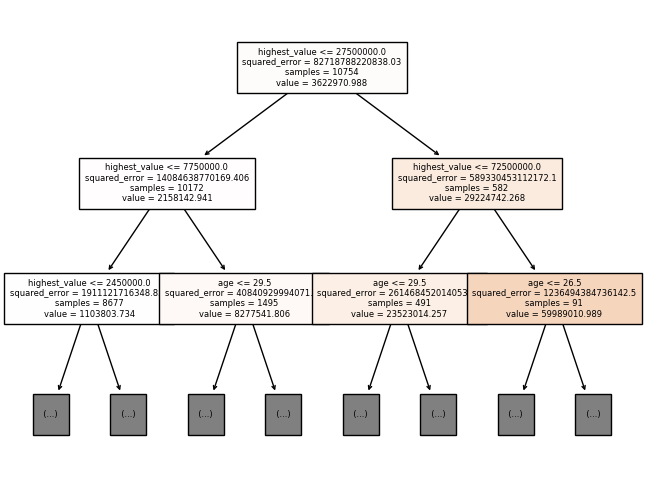

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=100)
plot_tree(mdlDtrMlb, max_depth=2, feature_names=X.columns, fontsize= 6, filled=True)
plt.show()

In [14]:
print('Predictions:')
print(X.head())
print('Price predictions:')
print(mdlDtrMlb.predict(X.head()))

Predictions:
   minutes played   assists     goals   age  appearance  award  highest_value
0            9390  0.000000  0.000000  32.0         104     13       70000000
1            1304  0.000000  0.000000  30.0          15      1       22000000
2             292  0.000000  0.000000  37.0           4      4        6000000
3            6408  0.056180  0.028090  25.0          82      9       50000000
4            5031  0.017889  0.017889  30.0          63     21       80000000
Price predictions:
[15000000.  1500000.   600000. 50000000. 40000000.]


In [15]:
y.head()

,current_value
0,15000000
1,1500000
2,600000
3,50000000
4,40000000


In [18]:
from sklearn.metrics import mean_absolute_error
y_pred = mdlDtrMlb.predict(X)
print('MAE:')
print(mean_absolute_error(y,y_pred))

MAE:
598.0807570913578


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=1) # Added x_train to fix the unpacking error

In [28]:
mdlDtrMlbSpl = DecisionTreeRegressor(random_state=1)
mdlDtrMlbSpl.fit(x_train, y_train)
y_test_pred = mdlDtrMlbSpl.predict(x_test)
print('MAE:')
print(mean_absolute_error(y_test,y_test_pred))

MAE:
1330544.7401725296


In [30]:
def get_mae(mx_lf_nds, x_trn, x_tst, y_trn, y_tst):
  mdlDtrMlbDpt = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds, random_state=1)
  mdlDtrMlbDpt.fit(x_trn,y_trn)
  y_tst_prd = mdlDtrMlbDpt.predict(x_tst)
  mae = mean_absolute_error(y_tst, y_tst_prd)
  return(mae)

In [34]:
for i in [5, 50, 500, 50000]:
  mae = get_mae(i, x_train, x_test, y_train, y_test)
  print('Max leaf nodes: ',i, '\t Mean Absolute Error: ',mae)

Max leaf nodes:  5 	 Mean Absolute Error:  2478649.7854967955
Max leaf nodes:  50 	 Mean Absolute Error:  1310653.572522183
Max leaf nodes:  500 	 Mean Absolute Error:  1315784.3066972853
Max leaf nodes:  50000 	 Mean Absolute Error:  1336971.9833152539


In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
mdlRfsMlb = RandomForestRegressor(random_state=1)

In [37]:
mdlRfsMlb.fit(x_train, y_train)

<ipython-input-37-215fcd563fe3>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdlRfsMlb.fit(x_train, y_train)


RandomForestRegressor(random_state=1)

In [39]:
y_test_pred = mdlRfsMlb.predict(x_test)

In [40]:
print('MAE (Random Forest):')
print(mean_absolute_error(y_test,y_test_pred))

MAE (Random Forest):
1016517.0611622018


For this model we found that max leaf nodes is 50
however we might improve it by changing values not saying it is the optimal.

we took one step further and analyzed with random forest instead of one tree we used multiple small trees and improved our result it was 1310k and it become 1016k. Around %22 improvement on this case.

Let's try the way that I did in the first task by splitting it to groups. This time I am considering to train with splitted groups and test on the whole sample. Let's analyze what will happen this time.

UPDATE: I missed one crucial effect of this method. # of rows doesn't match. Therefore analysis can not be  concluded. However we can try to do it for indiviual data sets that we seperated but since sample decreases variance will increase and result will be less accurate (I guess).

In [44]:
#substract the Defender's data from dfpv
dfDefender = dfpredict[dfpredict['position'].isin(['Defender Centre-Back', 'Defender Right-Back', 'Defender Left-Back', 'Defender'])]

In [51]:
y = dfDefender.loc[:,['current_value']]

In [52]:
X = dfDefender.loc[:,['minutes played','assists','goals','age','appearance','award','highest_value']]

In [53]:
X.head()

,minutes played,assists,goals,age,appearance,award,highest_value
3,6408,0.056180,0.028090,25.0,82,9,50000000
4,5031,0.017889,0.017889,30.0,63,21,80000000
5,4762,0.000000,0.037799,30.0,68,1,70000000
6,5471,0.032901,0.000000,28.0,70,10,35000000
7,416,0.000000,0.000000,31.0,8,7,20000000


In [54]:
from sklearn.tree import DecisionTreeRegressor
# Fix the seed to the random number generator to ensure same results each run.
mdlDtrMlb = DecisionTreeRegressor(random_state=1)

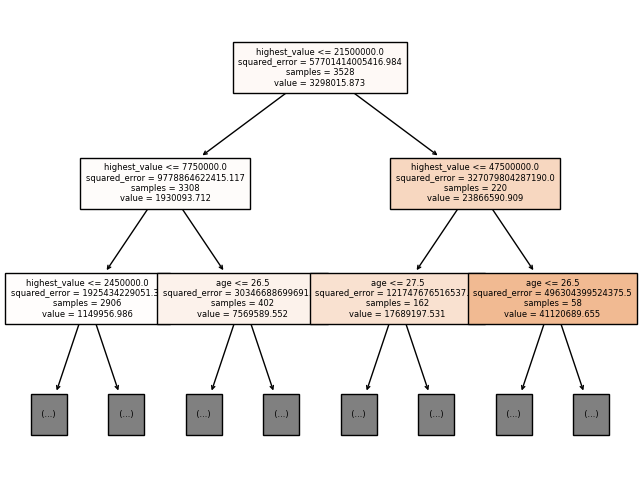

In [55]:
mdlDtrMlb.fit(X,y)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=100)
plot_tree(mdlDtrMlb, max_depth=2, feature_names=X.columns, fontsize= 6, filled=True)
plt.show()

We can increase the depth to see if it will improve it eventhough it is way off.

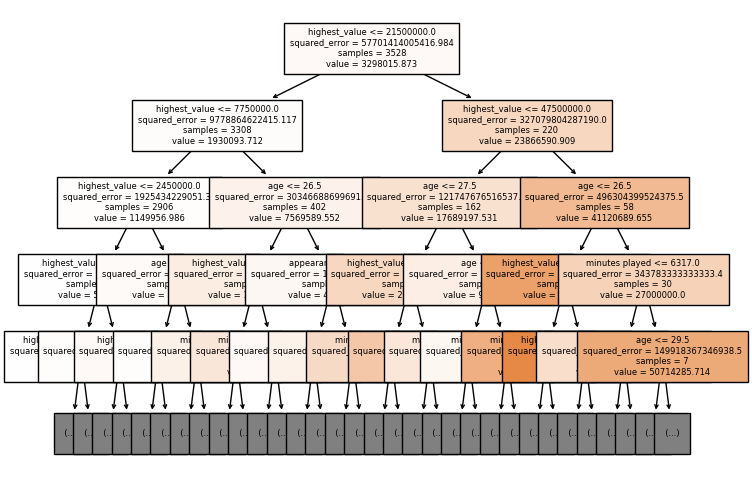

In [56]:
mdlDtrMlb.fit(X,y)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=100)
plot_tree(mdlDtrMlb, max_depth=4, feature_names=X.columns, fontsize= 6, filled=True)
plt.show()

In [57]:
print('Predictions:')
print(X.head())
print('Price predictions:')
print(mdlDtrMlb.predict(X.head()))

Predictions:
   minutes played   assists     goals   age  appearance  award  highest_value
3            6408  0.056180  0.028090  25.0          82      9       50000000
4            5031  0.017889  0.017889  30.0          63     21       80000000
5            4762  0.000000  0.037799  30.0          68      1       70000000
6            5471  0.032901  0.000000  28.0          70     10       35000000
7             416  0.000000  0.000000  31.0           8      7       20000000
Price predictions:
[50000000. 40000000. 25000000. 15000000.  2000000.]


In [58]:
y.head()

,current_value
3,50000000
4,40000000
5,25000000
6,15000000
7,2000000


In [59]:
from sklearn.metrics import mean_absolute_error
y_pred = mdlDtrMlb.predict(X)
print('MAE:')
print(mean_absolute_error(y,y_pred))

MAE:
63.775510204081634


At this point I already noticed and theory will stand for it self, since sample is smaller at this case for individual positions hence variance is higher hence noise is larger, prediction is less accurate.


DecisionTreeRegressor()

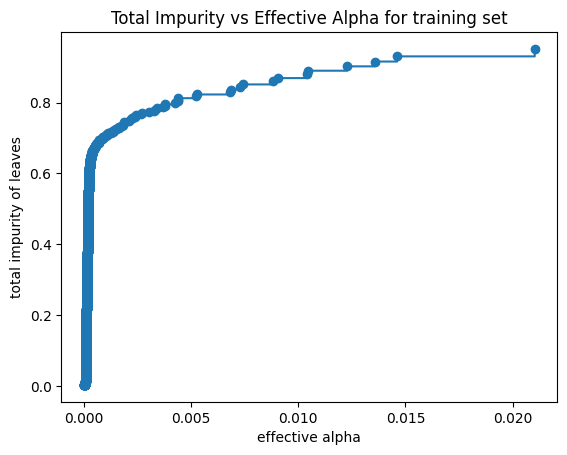

In [71]:
from sklearn.tree import DecisionTreeClassifier

# Construct the decision tree
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# Compute the cost-complexity pruning path
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the pruning path
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")

# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# Set the ccp_alpha parameter during initialization
clf = DecisionTreeRegressor(ccp_alpha=optimal_ccp_alpha) # Set ccp_alpha here

# Re-fit the tree
clf.fit(x_train, y_train)

In [73]:
# Construct the decision tree
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# Prune the tree using weakest link pruning
while True:
    # Find the weakest link
    weakest_link = np.argmin(clf.tree_.impurity)
    if weakest_link == 0:
        break
    # Prune the weakest link
    clf.tree_.children_left[weakest_link] = clf.tree_.children_right[weakest_link] = -1
    # Re-fit the tree
    clf.fit(x_train, y_train)

KeyboardInterrupt: 

In our IE303 integer optimization course, we learned techique so called pruning method, I wanted to adapt it to bigger decision tree model therefore I would be able to get more accurate result and in the same time code won't take an eternity to run. However I guess I failed to do so in the given time.